In [105]:
import os
result=[]
def search(dirname):
    try:
        filenames = os.listdir(dirname)
        for filename in filenames:
            full_filename = os.path.join(dirname, filename)
            if os.path.isdir(full_filename):
                search(full_filename)
            else:
                ext = os.path.splitext(full_filename)[-1]
                if ext == '.jpg': 
                    print(full_filename)
                    result.append(full_filename)
    except PermissionError:
        pass

search("/home/lab/dataset/facial_emotion_recognition/images/validation/sad")

/home/lab/dataset/facial_emotion_recognition/images/validation/sad/3508.jpg
/home/lab/dataset/facial_emotion_recognition/images/validation/sad/23832.jpg
/home/lab/dataset/facial_emotion_recognition/images/validation/sad/24881.jpg
/home/lab/dataset/facial_emotion_recognition/images/validation/sad/29897.jpg
/home/lab/dataset/facial_emotion_recognition/images/validation/sad/3825.jpg
/home/lab/dataset/facial_emotion_recognition/images/validation/sad/26670.jpg
/home/lab/dataset/facial_emotion_recognition/images/validation/sad/8266.jpg
/home/lab/dataset/facial_emotion_recognition/images/validation/sad/1536.jpg
/home/lab/dataset/facial_emotion_recognition/images/validation/sad/12498.jpg
/home/lab/dataset/facial_emotion_recognition/images/validation/sad/10386.jpg
/home/lab/dataset/facial_emotion_recognition/images/validation/sad/25330.jpg
/home/lab/dataset/facial_emotion_recognition/images/validation/sad/18193.jpg
/home/lab/dataset/facial_emotion_recognition/images/validation/sad/33691.jpg
/ho

In [106]:
len(result)

1139

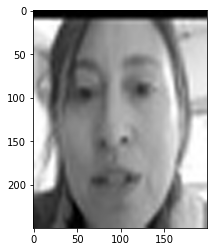

In [107]:
import cv2
import matplotlib.pyplot as plt
img=cv2.imread(result[225])
img=cv2.resize(img,(200,250),interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, device='cuda')
input=img
predict=fa.get_landmarks(input)

predict

In [108]:
import face_alignment
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, device='cuda')

input = img
preds = fa.get_landmarks(input)

In [109]:
from tqdm import tqdm, tqdm_notebook
from tqdm import trange
import time
test=[]
error=0
for i in tqdm(range(len(result))):
    time.sleep(0.00000001)
#########################여기 잘못만듬 다시 만들어야됨#################
    img=cv2.imread(result[i])
    img=cv2.resize(img,(200,250),interpolation=cv2.INTER_CUBIC)
    input = img
    preds = fa.get_landmarks(input)
    
    if preds == None:
        error+=1
    else:
        test.append(preds)

100%|██████████| 1139/1139 [00:26<00:00, 43.11it/s]


In [110]:
import numpy as np
test=np.array(test)

/home/lab/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [111]:
np.save('validation_sad.npy',test)

In [112]:
test.shape

(1109,)

In [114]:
test[1]

[array([[ -2.,  86.],
        [  0., 115.],
        [  3., 141.],
        [  6., 164.],
        [ 16., 186.],
        [ 26., 209.],
        [ 42., 228.],
        [ 61., 241.],
        [ 87., 251.],
        [112., 241.],
        [125., 231.],
        [135., 222.],
        [148., 202.],
        [158., 177.],
        [164., 154.],
        [170., 132.],
        [174., 106.],
        [ 29.,  70.],
        [ 42.,  61.],
        [ 58.,  61.],
        [ 71.,  64.],
        [ 80.,  67.],
        [129.,  70.],
        [138.,  67.],
        [151.,  64.],
        [161.,  67.],
        [167.,  77.],
        [103., 103.],
        [106., 122.],
        [106., 141.],
        [106., 154.],
        [ 87., 167.],
        [ 93., 170.],
        [100., 173.],
        [106., 170.],
        [112., 170.],
        [ 45.,  93.],
        [ 58.,  90.],
        [ 67.,  90.],
        [ 77.,  99.],
        [ 67.,  99.],
        [ 55.,  99.],
        [122.,  99.],
        [135.,  96.],
        [145.,  96.],
        [1